# CNN for Image Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Reshape, UpSampling2D, Activation
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from keras.callbacks import EarlyStopping
from PIL import Image
from keras.utils import to_categorical
from keras import backend as K
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os
import cv2
from sklearn.utils import shuffle
from sklearn.neighbors import NearestNeighbors
import pandas as pd
import seaborn as sns
import urllib
from pathlib import Path
from tqdm.notebook import tqdm
import pickle
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

# 1. CNN on Cifar-10 data set

In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [ ]:
y_train = y_train.flatten()
y_test = y_test.flatten()
print(y_train.shape)
print(y_test.shape)

(50000,)
(10000,)


Each label represents a different class:

0: airplane										
1: automobile										
2: bird										
3: cat										
4: deer										
5: dog										
6: frog										
7: horse										
8: ship										
9: truck

In [ ]:
class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

Class label: deer


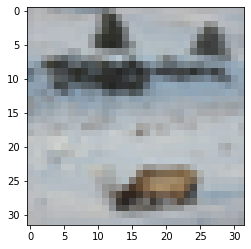

In [ ]:
example_id = 1254  # pick any integer from 0 to 49999 to visualize a training example
example = x_train[example_id]
label = y_train[example_id]
print("Class label:", class_labels[label])
plt.imshow(example)
plt.show()

In [ ]:
img_rows, img_cols, chns = 32, 32, 3
n_classes = 10

We need to (1) Reshape the input to put either n_channels first or last, depending on Kera's backend. (2) Normalize input so that it is from 0 to 1 instead of 0 to 255. (3) One-hot enconde the output variable.

In [ ]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], chns, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], chns, img_rows, img_cols)
    input_shape = (chns, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, chns)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, chns)
    input_shape = (img_rows, img_cols, chns)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [ ]:
x_train, y_train = shuffle(x_train,y_train,random_state=817328462)

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
# CNN Network
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size = (2 ,2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())        
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation = 'softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 64)        256       
_________________________________________________________________
dropout (Dropout)            (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
batch_size = 100
epochs = 25

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.15)

Epoch 1/25
425/425 [==============================] - 15s 19ms/step - loss: 2.0616 - accuracy: 0.3471 - val_loss: 2.5828 - val_accuracy: 0.2455
Epoch 2/25
425/425 [==============================] - 8s 18ms/step - loss: 1.3129 - accuracy: 0.5334 - val_loss: 1.1986 - val_accuracy: 0.5769
Epoch 3/25
425/425 [==============================] - 8s 18ms/step - loss: 1.1133 - accuracy: 0.6052 - val_loss: 1.1121 - val_accuracy: 0.6203
Epoch 4/25
425/425 [==============================] - 7s 18ms/step - loss: 1.0132 - accuracy: 0.6427 - val_loss: 0.9466 - val_accuracy: 0.6636
Epoch 5/25
425/425 [==============================] - 7s 18ms/step - loss: 0.9454 - accuracy: 0.6662 - val_loss: 0.9737 - val_accuracy: 0.6587
Epoch 6/25
425/425 [==============================] - 7s 18ms/step - loss: 0.8941 - accuracy: 0.6860 - val_loss: 0.9294 - val_accuracy: 0.6737
Epoch 7/25
425/425 [==============================] - 7s 18ms/step - loss: 0.8520 - accuracy: 0.6979 - val_loss: 0.9499 - val_accuracy: 0.666

In [ ]:
def plot_epochs(history):
  n_epochs = max(history.epoch)+1
  loss_train = history.history['accuracy']
  loss_val = history.history['val_accuracy']
  epochs = range(1,n_epochs+1)
  fig, ax = plt.subplots(figsize=(14,6))
  ax = sns.lineplot(x=epochs, y=loss_train,  label='training accuracy')
  ax = sns.lineplot(x=epochs, y=loss_val,  label='validation accuracy')
  ax.grid(color='black', linestyle='-', linewidth=0.1)
  ax.set_xticks(np.arange(1,n_epochs,1))
  ax.set_xlim(1)
  plt.title('Training and Validation Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

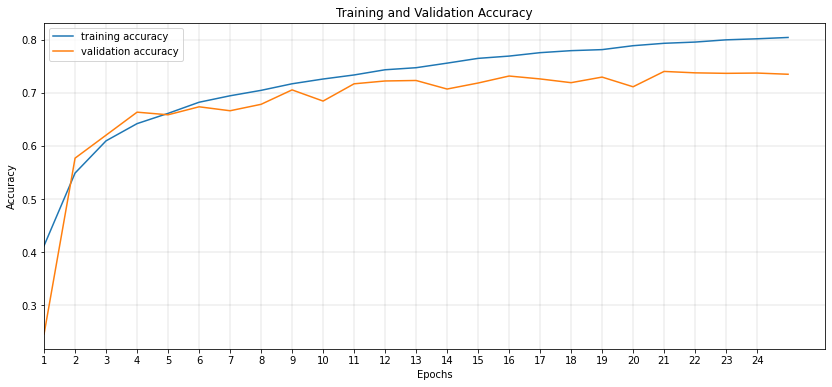

In [ ]:
plot_epochs(history)

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.792100727558136
Test accuracy: 0.7421000003814697


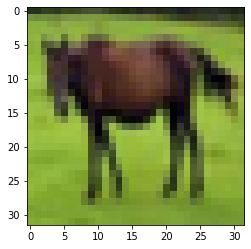

In [ ]:
example_id = 4272  # pick any integer from 0 to 49999 to visualize a training example
example = x_test[example_id]
plt.imshow(example)
plt.show()

In [ ]:
test = x_test[example_id]
test.shape = [1, 32, 32, 3]
print(test.shape)
predictions = model.predict(test)
print('Probability of being an airplane = ' + str(round(predictions[0,0]*100,2)) + '%')
print('Probability of being an auto = ' + str(round(predictions[0,1]*100,2)) + '%')
print('Probability of being a bird = ' + str(round(predictions[0,2]*100,2)) + '%')
print('Probability of being a cat = ' + str(round(predictions[0,3]*100,2)) + '%')
print('Probability of being a deer = ' + str(round(predictions[0,4]*100,2)) + '%')
print('Probability of being a dog = ' + str(round(predictions[0,5]*100,2)) + '%')
print('Probability of being a frog = ' + str(round(predictions[0,6]*100,2)) + '%')
print('Probability of being a horse = ' + str(round(predictions[0,7]*100,2)) + '%')
print('Probability of being a ship = ' + str(round(predictions[0,8]*100,2)) + '%')
print('Probability of being a truck = ' + str(round(predictions[0,9]*100,2)) + '%')

(1, 32, 32, 3)
Probability of being an airplane = 0.0%
Probability of being an auto = 0.0%
Probability of being a bird = 0.0%
Probability of being a cat = 0.0%
Probability of being a deer = 0.04%
Probability of being a dog = 0.0%
Probability of being a frog = 0.0%
Probability of being a horse = 99.96%
Probability of being a ship = 0.0%
Probability of being a truck = 0.0%


# 2. CNN on INTEL images data set

In [ ]:
def get_images(directory):
    Images = []
    Labels = [] 
    
    for labels in tqdm(os.listdir(directory)): #Main Directory where each class label is present as folder name.
        label=labels
        
        for image_file in os.listdir(directory+labels): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV) 0 means greyscale
            image = cv2.resize(image,(128,128)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append(label)
        
    return shuffle(Images,Labels,random_state=817328462) #Shuffle the dataset you just prepared.

In [ ]:
images_train, labels_train = get_images("/content/drive/MyDrive/data/seg_train/seg_train/")
images_test, labels_test = get_images("/content/drive/MyDrive/data/seg_test/seg_test/")

In [ ]:
x_train = np.asarray(images_train)
x_test = np.asarray(images_test)

In [ ]:
x_train.shape

(14034, 128, 128, 3)

In [ ]:
y_train = pd.get_dummies(labels_train).values
y_test = pd.get_dummies(labels_test).values

In [ ]:
y_train.shape

(14034, 6)

In [ ]:
with open(os.path.join("/content", "drive", "MyDrive", "data", "intel", "x_train.p"), "wb") as f:
    pickle.dump(x_train, f)

In [ ]:
with open(os.path.join("/content", "drive", "MyDrive", "data", "intel", "x_test.p"), "wb") as f:
    pickle.dump(x_test, f)

In [ ]:
with open(os.path.join("/content", "drive", "MyDrive", "data", "intel", "y_train.p"), "wb") as f:
    pickle.dump(y_train, f)

In [ ]:
with open(os.path.join("/content", "drive", "MyDrive", "data", "intel", "y_test.p"), "wb") as f:
    pickle.dump(y_test, f)

In [ ]:
# To read the pickles later:
with open(os.path.join("/content", "drive", "MyDrive", "data", "intel", "x_train.p"), "rb") as f:
    x_train = pickle.load(f)
with open(os.path.join("/content", "drive", "MyDrive", "data", "intel", "x_test.p"), "rb") as f:
    x_test = pickle.load(f)
with open(os.path.join("/content", "drive", "MyDrive", "data", "intel", "y_train.p"), "rb") as f:
    y_train = pickle.load(f)
with open(os.path.join("/content", "drive", "MyDrive", "data", "intel", "y_test.p"), "rb") as f:
    y_test = pickle.load(f)

In [ ]:
classes_dict = {0: 'Buildings', 1: 'Forest', 2: 'Glacier',
                3: 'Mountains', 4: 'Sea', 5: 'Street'}

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(14034, 128, 128, 3)
(3000, 128, 128, 3)
(14034, 6)
(3000, 6)


In [ ]:
x_train = x_train.astype('float32')
x_train /= 255
x_test = x_test.astype('float32')
x_test /= 255

In [ ]:
# We create out network
model = Sequential(name='cnn')

# 1st convolutional layer
model.add(Conv2D(64, kernel_size=4, input_shape=(128,128,3), name='1st_CL'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(4 ,4), name='1st_MP'))
model.add(Dropout(0.4))

#2nd convolutional layer
model.add(Conv2D(64, kernel_size=4,  name='2nd_CL'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(4 ,4), name='2nd_MP'))
model.add(Dropout(0.4))

#Fully-connected layer (flatten first)
model.add(Flatten())        
model.add(Dense(128, name='Dense'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.4))

# Output Softmax Layer
model.add(Dense(6, activation = 'softmax', name='Output_Softmax'))

print(model.summary())


Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1st_CL (Conv2D)              (None, 125, 125, 64)      3136      
_________________________________________________________________
batch_normalization_22 (Batc (None, 125, 125, 64)      256       
_________________________________________________________________
activation_15 (Activation)   (None, 125, 125, 64)      0         
_________________________________________________________________
1st_MP (MaxPooling2D)        (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 31, 31, 64)        0         
_________________________________________________________________
2nd_CL (Conv2D)              (None, 28, 28, 64)        65600     
_________________________________________________________________
batch_normalization_23 (Batc (None, 28, 28, 64)        256     

In [ ]:
# We create out network
model = Sequential(name='cnn')

# 1st convolutional layer
model.add(Conv2D(64, kernel_size=4, activation='relu', input_shape=(128,128,3), name='1st_CL'))
model.add(MaxPooling2D(pool_size =(4 ,4), name='1st_MP'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#2nd convolutional layer
model.add(Conv2D(64, kernel_size=4, activation='relu', name='2nd_CL'))
model.add(MaxPooling2D(pool_size =(4 ,4), name='2nd_MP'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

#Fully-connected layer (flatten first)
model.add(Flatten())        
model.add(Dense(128, activation='relu', name='Dense'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Output Softmax Layer
model.add(Dense(6, activation = 'softmax', name='Output_Softmax'))

print(model.summary())

Model: "cnn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
1st_CL (Conv2D)              (None, 125, 125, 64)      3136      
_________________________________________________________________
1st_MP (MaxPooling2D)        (None, 31, 31, 64)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 31, 31, 64)        256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
2nd_CL (Conv2D)              (None, 28, 28, 64)        65600     
_________________________________________________________________
2nd_MP (MaxPooling2D)        (None, 7, 7, 64)          0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 7, 7, 64)          256     

In [ ]:
opt = keras.optimizers.Adam()
model.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
batch_size = 100
epochs = 40

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.25)

Epoch 1/40
106/106 [==============================] - 14s 122ms/step - loss: 1.3254 - accuracy: 0.4941 - val_loss: 3.2370 - val_accuracy: 0.1559
Epoch 2/40
106/106 [==============================] - 13s 119ms/step - loss: 0.8334 - accuracy: 0.6844 - val_loss: 2.7735 - val_accuracy: 0.1559
Epoch 3/40
106/106 [==============================] - 13s 120ms/step - loss: 0.6905 - accuracy: 0.7408 - val_loss: 2.7028 - val_accuracy: 0.3445
Epoch 4/40
106/106 [==============================] - 13s 119ms/step - loss: 0.6388 - accuracy: 0.7648 - val_loss: 2.3119 - val_accuracy: 0.3280
Epoch 5/40
106/106 [==============================] - 13s 120ms/step - loss: 0.5726 - accuracy: 0.7988 - val_loss: 1.0932 - val_accuracy: 0.6039
Epoch 6/40
106/106 [==============================] - 13s 119ms/step - loss: 0.5280 - accuracy: 0.8094 - val_loss: 0.6302 - val_accuracy: 0.7786
Epoch 7/40
106/106 [==============================] - 13s 119ms/step - loss: 0.5382 - accuracy: 0.8041 - val_loss: 0.8953 - val_ac

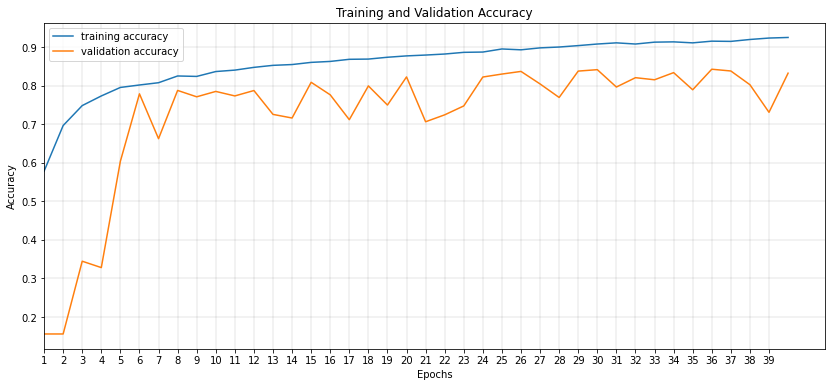

In [ ]:
plot_epochs(history)

Validation accuracy becomes very fluctuating after epoch 8, perhaps not a good sign. We get however a very decent accuracy on the testing set.

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.5172826051712036
Test accuracy: 0.8306666612625122


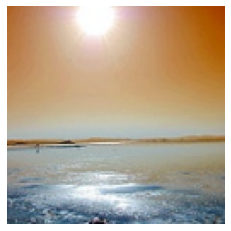

Real Class is  Sea


In [ ]:
example_id = 1005 
example = x_test[example_id]
plt.imshow(example)
plt.axis('off')
plt.show()
print("Real Class is ", color.BOLD + classes_dict[pd.Series(y_test[example_id]).idxmax(axis=1)] + color.END)

In [ ]:
def show_image(im):
  fig, ax = plt.subplots(figsize=(8,8))
  plt.imshow(im)
  plt.axis('off')
  plt.show()

Real Class is  Glacier


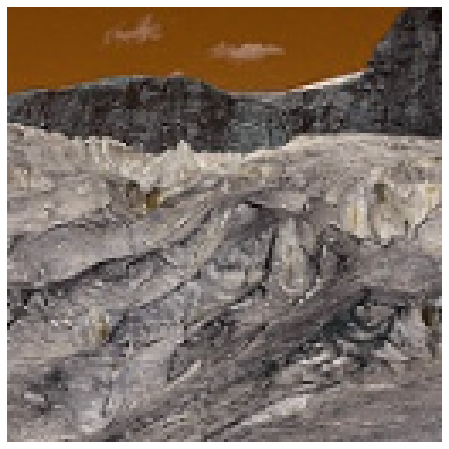

Probab. Building = 0.18%
Probab. Forest = 0.0%
Probab. Glacier= 87.3%
Probab. Mountain = 9.24%
Probab. Sea = 3.26%
Probab. Street = 0.01%


In [ ]:
example_id=498
test = np.expand_dims(x_test[example_id], axis=0) 
print("Real Class is ", color.BOLD + classes_dict[pd.Series(y_test[example_id]).idxmax(axis=1)] + color.END)
show_image(x_test[example_id])
predictions = model.predict(test)
print('Probab. Building = ' + color.BOLD + str(round(predictions[0,0]*100,2)) + '%' + color.END)
print('Probab. Forest = ' + color.BOLD + str(round(predictions[0,1]*100,2)) + '%' + color.END)
print('Probab. Glacier= ' + color.BOLD + str(round(predictions[0,2]*100,2)) + '%' + color.END)
print('Probab. Mountain = ' + color.BOLD + str(round(predictions[0,3]*100,2)) + '%' + color.END)
print('Probab. Sea = ' + color.BOLD + str(round(predictions[0,4]*100,2)) + '%' + color.END)
print('Probab. Street = ' + color.BOLD + str(round(predictions[0,5]*100,2)) + '%' + color.END)